# Machine Learning - Random Forest (Floresta Aleatória)

#### Importação das bibliotecas necessárias

In [1]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base de dados.

In [2]:
df_edu = pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
df_edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### Verificando as distribuições de classes.

In [4]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

#### Verificando os registros nulos

In [5]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### Codificando os atributos numéricos.

In [6]:
Features = df_edu # armazenando o dataframe na variavel Features
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col]) # Transformna os valores do tipo categorico no dataframe em um valor numerico

In [7]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


#### Dividindo os dados em treino e teste

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, x_test, y_train, y_test = train_test_split(df_edu.drop('Class', axis=1), df_edu['Class'], test_size=0.3, random_state=0)

#### Verificando a forma dos dados

In [10]:
X_train.shape, x_test.shape

((336, 16), (144, 16))

In [11]:
y_train.shape, y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [12]:
random_clf = RandomForestClassifier()

#### Parâmetros do  objeto RandomForestClassifier
* <span style="color:red">n_estimators: número de árvores que serão criadas na floresta.</span>
* <span style="color:red"> bootstrap: se será considerado o bootstrap dataset durante a criação das árvores.</span>
* <span style="color:red"> max_features: número total de features que as árvores serão criadas.</span>
* criterion: medida de qualidade da divisão.
* splitter: estratégia utilizada para dividir o nó de decisão.
* max_depth: profundidade máxima da árvore.
* min_samples_split: número de amostras mínimas para considerar um nó para divisão.
* min_samples_leaf: número de amostras mínimas no nível folha.

#### Treinando o modelo Random Forest

In [13]:
random_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predizendo as classes a partir do modelo treinado utilizando o conjunto de teste

In [17]:
resultado = random_clf.predict(x_test)

In [18]:
resultado

array([2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.76      0.64      0.69        39
           1       0.78      0.94      0.85        34
           2       0.77      0.76      0.77        71

    accuracy                           0.77       144
   macro avg       0.77      0.78      0.77       144
weighted avg       0.77      0.77      0.77       144



#### Verificando as features mais importantes para o modelo treinado

In [20]:
random_clf.feature_importances_

array([0.02373555, 0.03483916, 0.03517782, 0.01706409, 0.03480121,
       0.01939918, 0.04073082, 0.011883  , 0.04300753, 0.16909711,
       0.1738216 , 0.11351866, 0.09803881, 0.03970491, 0.02034922,
       0.12483132])

In [25]:
feature_imp = pd.Series(random_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [26]:
feature_imp

VisITedResources            0.173822
raisedhands                 0.169097
StudentAbsenceDays          0.124831
AnnouncementsView           0.113519
Discussion                  0.098039
Relation                    0.043008
Topic                       0.040731
ParentAnsweringSurvey       0.039705
PlaceofBirth                0.035178
NationalITy                 0.034839
GradeID                     0.034801
gender                      0.023736
ParentschoolSatisfaction    0.020349
SectionID                   0.019399
StageID                     0.017064
Semester                    0.011883
dtype: float64

#### Features mais importantes de forma gráfica

In [23]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

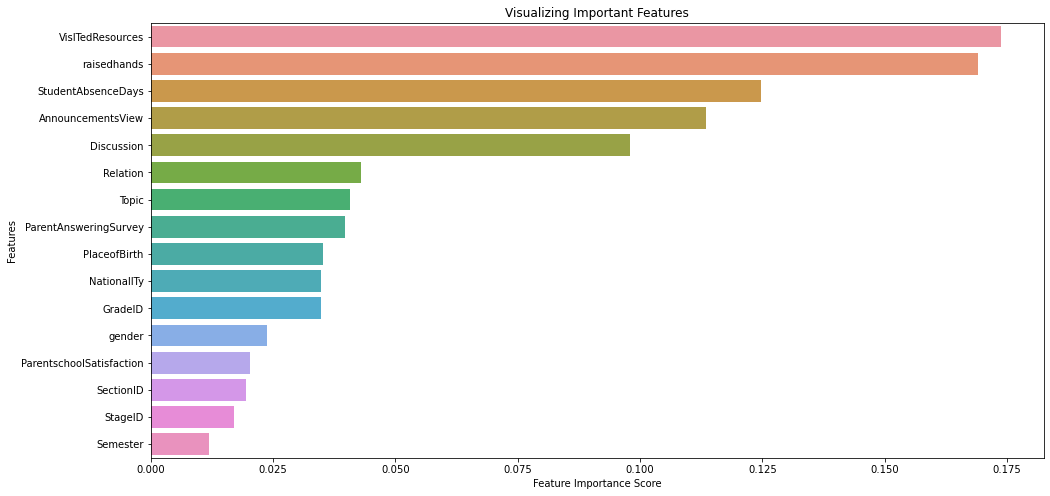

In [27]:
visualiza_features_importantes(feature_imp)

#### Selecionando apenas as features com importancia acima de um determinado score.

In [75]:
features_selecionadas = []
for feature, importancia in feature_imp.iteritems():
    if importancia > 0.035:
        print(f"{feature}:\t{importancia}")
        features_selecionadas.append(feature)

VisITedResources:	0.17382160401540514
raisedhands:	0.16909711096450744
StudentAbsenceDays:	0.12483132451689793
AnnouncementsView:	0.11351866052152342
Discussion:	0.09803880751730157
Relation:	0.04300753410439845
Topic:	0.0407308198215958
ParentAnsweringSurvey:	0.03970490619652894
PlaceofBirth:	0.03517782263996367


#### Separando os dados em treino e teste utilizando apenas as features selecionadas

In [76]:
X_train, x_test, y_train, y_test = train_test_split(
    df_edu[features_selecionadas],
    df_edu['Class'],
    test_size=0.3,
    random_state=0
)

#### Verificando a nova forma dos dados

In [77]:
X_train.shape, x_test.shape

((336, 9), (144, 9))

In [78]:
y_train.shape, y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [79]:
random_clf = RandomForestClassifier(random_state=0)

#### Treinando novamente o modelo Random Forest

In [80]:
random_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [81]:
resultado = random_clf.predict(x_test)
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [82]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72        39
           1       0.80      0.97      0.88        34
           2       0.82      0.70      0.76        71

    accuracy                           0.78       144
   macro avg       0.77      0.81      0.78       144
weighted avg       0.78      0.78      0.78       144



## Explorando as árvores da Floresta gerada

In [83]:
print(f"Número de árvores da floresta: {len(random_clf.estimators_)}")
print("Árvores floresta gerada:")
for tree in random_clf.estimators_:
    print(f"\nNumero de nós: {tree.tree_.node_count}")
    print(f"Profundidade da árvores: {tree.tree_.max_depth}")
    print(f"Features importantes: {tree.feature_importances_}")
    print(f"\nObjeto: {tree}")

Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 125
Profundidade da árvores: 10
Features importantes: [0.23625987 0.04666981 0.24943917 0.10918607 0.10273976 0.15247543
 0.06333133 0.02004156 0.01985701]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=209652396, splitter='best')

Numero de nós: 137
Profundidade da árvores: 12
Features importantes: [0.21315773 0.12770401 0.04951714 0.28633865 0.02662179 0.10504931
 0.06725365 0.0364558  0.08790191]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_

#### Selecionando uma árvore da floresta

In [84]:
tree0 = random_clf.estimators_[0]

#### Visualizando de forma gráfica

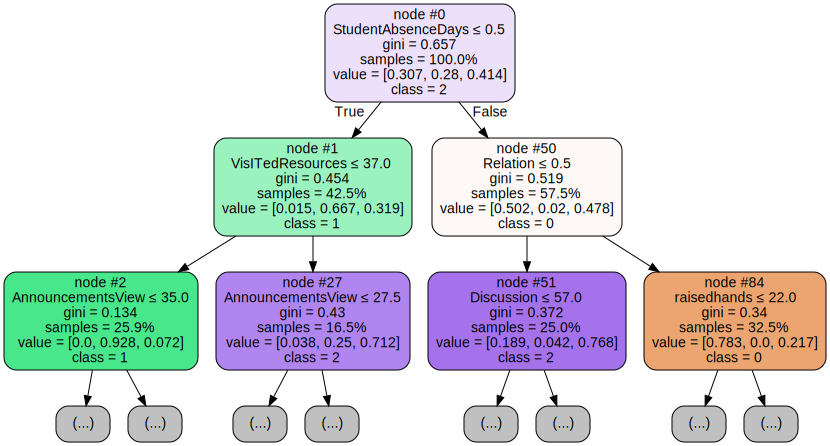

In [85]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

#### Selecionando outra árvore da floresta

In [86]:
tree1 = random_clf.estimators_[1]

#### Visualizando de forma gráfica

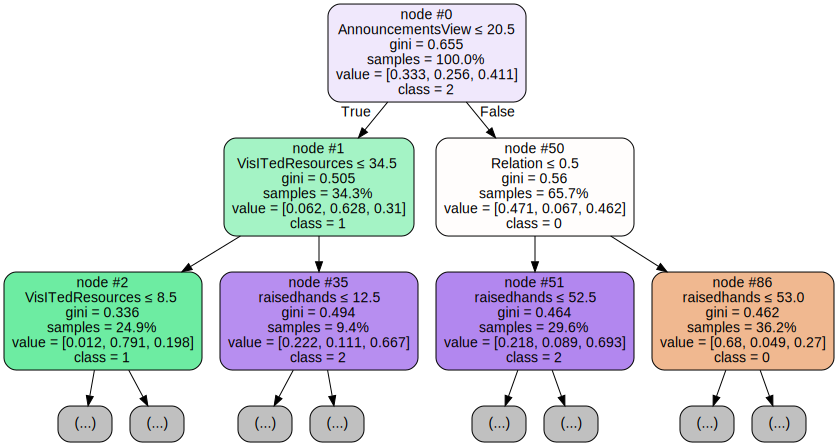

In [87]:
dot_data = export_graphviz(
         tree1,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph